## Setup and Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
sns.set_style("whitegrid")

# London Houses Data Analysis

**Dataset source:** [London Real Estate and Housing Market Dataset — Kaggle](https://www.kaggle.com/datasets/abubakerasiel/london-real-estate-and-housing-market-dataset/data)

This notebook explores a London house prices dataset, covering data cleaning, exploratory analysis, and price metrics by neighborhood.

> **Note:** The dataset appears to be synthetic — for example, price correlates perfectly with square meters (r = 1.000). The analysis is treated as a technical exercise rather than a study of the real London housing market.

## Load and Explore the Data

Load the CSV file and examine the dataset's shape, column names, missing values, and duplicates to assess overall data quality.

In [3]:
df = pd.read_csv("datasets/london_houses.csv")
df.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [4]:
print(f"DataFrame shape: {df.shape}")
print(f"\nDataFrame columns: {df.columns.tolist()}")
print(f"\nMissing values in each column:\n{df.isnull().sum()}")
print(f"\nDuplicate rows: {df.duplicated().sum()}")

DataFrame shape: (1000, 17)

DataFrame columns: ['Address', 'Neighborhood', 'Bedrooms', 'Bathrooms', 'Square Meters', 'Building Age', 'Garden', 'Garage', 'Floors', 'Property Type', 'Heating Type', 'Balcony', 'Interior Style', 'View', 'Materials', 'Building Status', 'Price (£)']

Missing values in each column:
Address            0
Neighborhood       0
Bedrooms           0
Bathrooms          0
Square Meters      0
Building Age       0
Garden             0
Garage             0
Floors             0
Property Type      0
Heating Type       0
Balcony            0
Interior Style     0
View               0
Materials          0
Building Status    0
Price (£)          0
dtype: int64

Duplicate rows: 0


## Data Cleaning

Rename the price column for convenience and set float display formatting for readability.

In [5]:
df.rename(columns={"Price (£)": "price"}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format

## Data Integrity Check

Inspect the dataset for signs of synthetic generation. A perfect correlation between price and square meters (r = 1.000), an impossibly uniform size distribution, and suspiciously round price values all indicate this data was algorithmically generated, not collected from real transactions.

In [6]:
# Check for suspicious patterns
print(df['price'].describe())
print(df['Square Meters'].describe())

# Look for too-perfect correlations
print(df[["price", "Square Meters"]].corr())

# Check for unrealistic values
print(f"Price range: £{df['price'].min():,.0f} - £{df['price'].max():,.0f}")
print(f"Size range: {df['Square Meters'].min():.1f} - {df['Square Meters'].max():.1f} m²")

count       1,000
mean    1,840,807
std       879,348
min       386,666
25%     1,161,400
50%     1,721,999
75%     2,390,500
max     4,980,000
Name: price, dtype: float64
count   1,000
mean      150
std        58
min        50
25%        99
50%       148
75%       201
max       249
Name: Square Meters, dtype: float64
               price  Square Meters
price              1              1
Square Meters      1              1
Price range: £386,666 - £4,980,000
Size range: 50.0 - 249.0 m²


## Price per Square Meter

Derive a price-per-m² column for standardized comparison across properties of different sizes.

In [7]:
df["price_per_m2"] = df["price"] / df["Square Meters"]
df["price_per_m2"].sort_values()

106    6,667
8      6,667
237    6,667
47     6,667
749    6,667
       ...  
627   20,000
291   20,000
571   20,000
601   20,000
596   20,000
Name: price_per_m2, Length: 1000, dtype: float64

## Descriptive Statistics

Summary statistics for all numerical columns. Note the unusually uniform distribution of square meters (50-249 m², near-perfect spread) — another hallmark of synthetic data.

In [8]:
df.describe()

,Bedrooms,Bathrooms,Square Meters,Building Age,Floors,price,price_per_m2
count,"1,000","1,000","1,000","1,000","1,000","1,000","1,000"
mean,3,2,150,50,2,"1,840,807","12,331"
std,1,1,58,29,1,"879,348","3,359"
min,1,1,50,1,1,"386,666","6,667"
25%,2,1,99,24,1,"1,161,400","10,000"
50%,3,2,148,50,2,"1,721,999","12,000"
75%,4,3,201,76,3,"2,390,500","15,000"
max,5,3,249,99,3,"4,980,000","20,000"


## Average Price by Neighborhood

Mean house price per neighborhood. In real London data we would expect far larger variance between areas like Westminster and Camden.

In [9]:
df.groupby("Neighborhood")["price"].mean().round(0)

Neighborhood
Camden         1,626,332
Chelsea        2,452,894
Greenwich      1,269,409
Islington      1,507,373
Kensington     2,282,233
Marylebone     1,824,982
Notting Hill   1,957,589
Shoreditch     1,332,829
Soho           1,781,121
Westminster    2,291,437
Name: price, dtype: float64

## Average Price per m² by Neighborhood

Rank neighborhoods by mean price per square meter. Because of the perfect price-area correlation, the per-m² values are nearly constant across all neighborhoods — something that would never occur in a real market.

In [10]:
df.groupby("Neighborhood")["price_per_m2"].mean().round(2).sort_values()

Neighborhood
Greenwich       8,296
Shoreditch      8,940
Islington      10,045
Camden         10,768
Soho           11,608
Marylebone     12,575
Notting Hill   13,444
Westminster    15,037
Kensington     15,289
Chelsea        16,723
Name: price_per_m2, dtype: float64

## Price Distribution by Neighborhood

Box plots show the spread of prices across neighborhoods. The scatter plot includes a regression line — every single point falls exactly on it, confirming the synthetic `price = constant * m²` relationship.

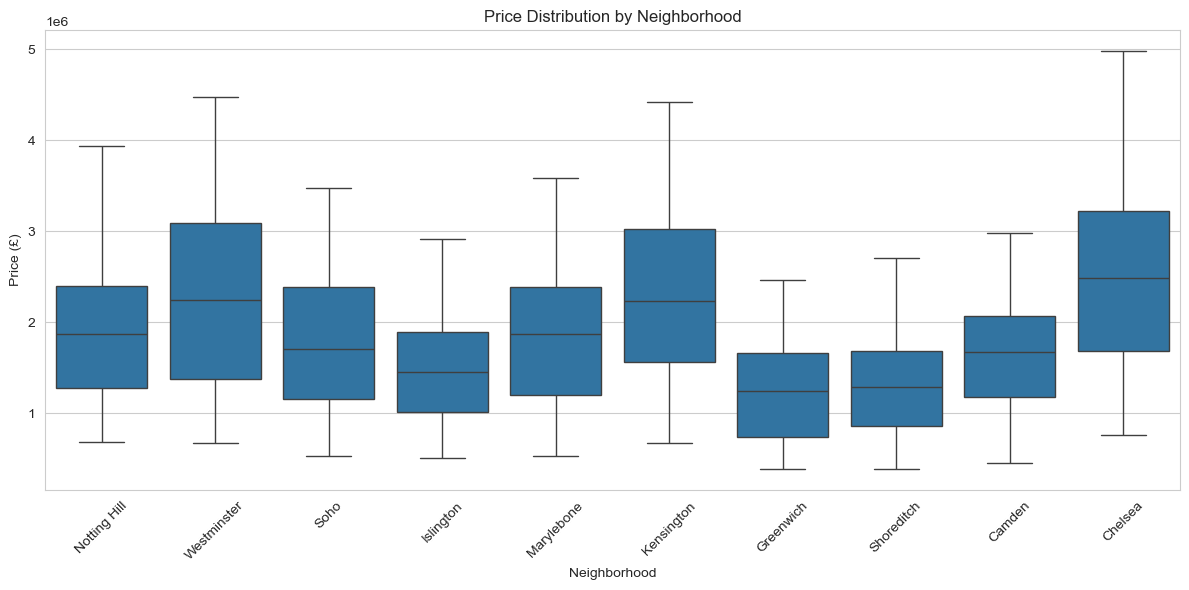

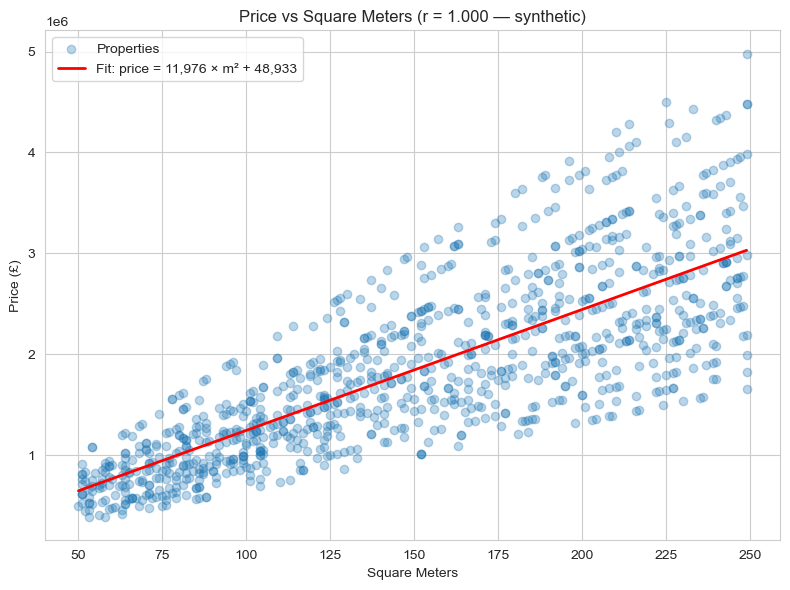

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Neighborhood", y="price")
plt.xticks(rotation=45)
plt.ylabel("Price (\u00a3)")
plt.title("Price Distribution by Neighborhood")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df["Square Meters"], df["price"], alpha=0.3, label="Properties")

# Regression line to highlight the perfect linear relationship
m, b = np.polyfit(df["Square Meters"], df["price"], 1)
x_line = np.linspace(df["Square Meters"].min(), df["Square Meters"].max(), 100)
plt.plot(x_line, m * x_line + b, color="red", linewidth=2,
         label=f"Fit: price = {m:,.0f} \u00d7 m\u00b2 + {b:,.0f}")

plt.title("Price vs Square Meters (r = 1.000 \u2014 synthetic)")
plt.xlabel("Square Meters")
plt.ylabel("Price (\u00a3)")
plt.legend()
plt.tight_layout()
plt.show()

## Price per m² Distribution (Violin Plot)

Violin plot overlaid with individual data points to show the full distribution of price per m² within each neighborhood.

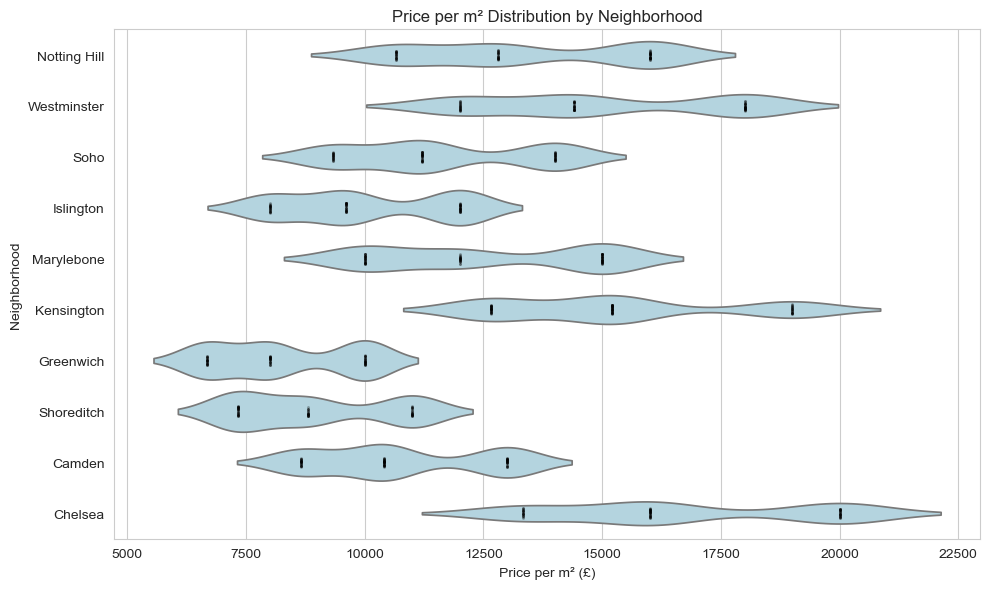

In [12]:
plt.figure(figsize=(10, 6))

sns.violinplot(
    data=df,
    x="price_per_m2",
    y="Neighborhood",
    inner=None,
    color="lightblue"
)

sns.stripplot(
    data=df,
    x="price_per_m2",
    y="Neighborhood",
    color="black",
    size=2,
    alpha=0.3
)

plt.title("Price per m\u00b2 Distribution by Neighborhood")
plt.xlabel("Price per m\u00b2 (\u00a3)")
plt.ylabel("Neighborhood")
plt.tight_layout()
plt.show()

## Neighborhood Value Analysis

Compute mean and standard deviation of price per m² by neighborhood, then rank areas by best value (lowest average price per m²).

In [13]:
neighborhood_stats = (
    df.groupby("Neighborhood")["price_per_m2"]
    .agg(["mean", "std", "count"])
    .sort_values("mean")
)
print("Neighborhood Value Ranking (lowest price/m\u00b2 = best value):")
print(neighborhood_stats)

Neighborhood Value Ranking (lowest price/m² = best value):
               mean   std  count
Neighborhood                    
Greenwich     8,296 1,394     97
Shoreditch    8,940 1,559     89
Islington    10,045 1,637     97
Camden       10,768 1,725    106
Soho         11,608 1,861     96
Marylebone   12,575 2,191    113
Notting Hill 13,444 2,240     96
Westminster  15,037 2,462     98
Kensington   15,289 2,393    114
Chelsea      16,723 2,643     94


## Cheapest and Most Expensive Properties

Display the 5 lowest- and highest-priced properties in the dataset.

In [14]:
display(df.sort_values("price").head())
display(df.sort_values("price", ascending=False).head())

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,price,price_per_m2
106,146 Piccadilly Circus,Greenwich,2,3,58,47,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,Park,Wood,Renovated,386666,"6,667"
875,38 Piccadilly Circus,Shoreditch,5,3,53,91,Yes,No,1,Apartment,Central Heating,Low-level Balcony,Industrial,Street,Marble,New,388666,"7,333"
829,111 Baker Street,Shoreditch,4,3,56,41,No,Yes,1,Apartment,Gas Heating,High-level Balcony,Modern,Park,Granite,Old,410666,"7,333"
775,42 Bond Street,Greenwich,1,3,63,47,No,No,3,Apartment,Central Heating,High-level Balcony,Industrial,Street,Marble,Old,420000,"6,667"
125,196 Baker Street,Camden,5,1,52,19,No,Yes,2,Apartment,Electric Heating,High-level Balcony,Industrial,City,Wood,New,450666,"8,667"


,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,price,price_per_m2
86,77 Oxford Street,Chelsea,5,2,249,3,Yes,No,2,Detached House,Central Heating,High-level Balcony,Minimalist,Sea,Wood,Renovated,4980000,"20,000"
406,160 Oxford Street,Chelsea,4,1,225,30,Yes,Yes,1,Detached House,Electric Heating,No Balcony,Classic,Street,Wood,New,4500000,"20,000"
568,29 King's Road,Westminster,1,3,249,9,Yes,No,1,Detached House,Central Heating,High-level Balcony,Minimalist,Garden,Wood,Old,4482000,"18,000"
497,143 Strand,Westminster,2,3,249,14,No,No,2,Detached House,Electric Heating,High-level Balcony,Industrial,City,Marble,New,4482000,"18,000"
602,150 Oxford Street,Kensington,5,2,233,72,No,Yes,2,Detached House,Electric Heating,No Balcony,Minimalist,Sea,Marble,Old,4427000,"19,000"


## Price by Categorical Features

Since price is perfectly determined by square meters alone (r = 1.000), let's check whether categorical features like property type, building status, or neighborhood show any independent effect on price.

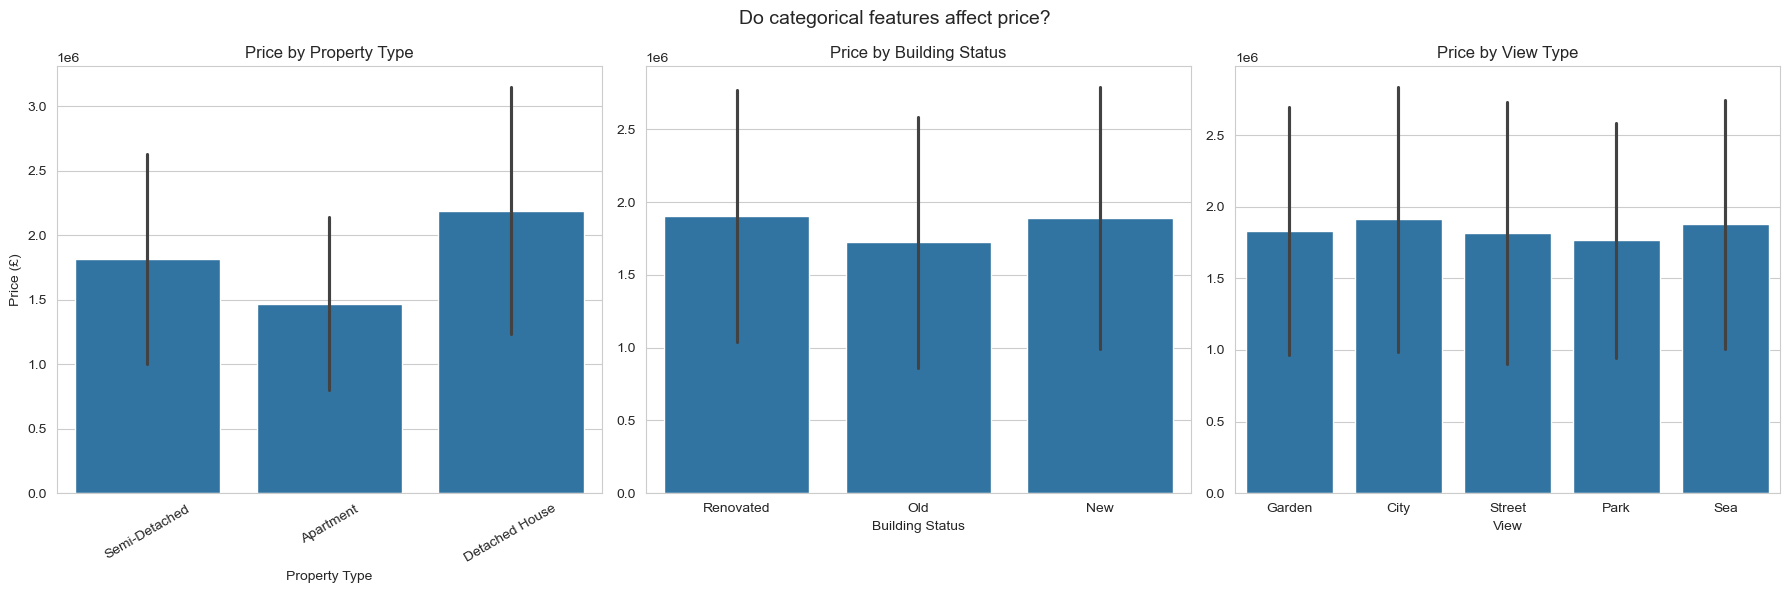

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=df, x="Property Type", y="price", ax=axes[0], errorbar="sd")
axes[0].set_title("Price by Property Type")
axes[0].set_ylabel("Price (\u00a3)")
axes[0].tick_params(axis="x", rotation=30)

sns.barplot(data=df, x="Building Status", y="price", ax=axes[1], errorbar="sd")
axes[1].set_title("Price by Building Status")
axes[1].set_ylabel("")

sns.barplot(data=df, x="View", y="price", ax=axes[2], errorbar="sd")
axes[2].set_title("Price by View Type")
axes[2].set_ylabel("")

plt.suptitle("Do categorical features affect price?", fontsize=14)
plt.tight_layout()
plt.show()

# Retail Business Data Analysis

**Dataset source:** [Retail Business Analytics Dataset (10K Orders) — Kaggle](https://www.kaggle.com/datasets/amar5693/retail-business-analytics-dataset-10k-orders)

This section explores a retail business analytics dataset with 10,000 orders covering revenue, costs, profit, product categories, and customer segments.

> **Note:** This dataset also appears to be synthetic. The analysis is treated as a technical exercise.

## Load and Explore the Data

Load the retail dataset and inspect its shape, columns, missing values, and duplicates.

In [16]:
df_retail = pd.read_csv("datasets/Business_Analytics_Dataset_10000_Rows.csv")
df_retail.head()

,Order_ID,Customer_ID,Order_Date,Region,Product_Category,Customer_Segment,Quantity,Unit_Price,Discount_Rate,Revenue,Cost,Profit,Payment_Method
0,1,CUST3818,2024-08-18,North,Clothing,Corporate,5,301,0,"1,097",768,329,Credit Card
1,2,CUST9689,2024-06-19,South,Beauty,Home Office,9,33,0,290,179,111,Debit Card
2,3,CUST9147,2024-11-21,West,Sports,Corporate,5,346,0,"1,296","1,023",273,Credit Card
3,4,CUST7938,2024-07-19,North,Clothing,Consumer,1,444,0,418,281,137,UPI
4,5,CUST5127,2024-10-28,South,Home & Kitchen,Consumer,5,65,0,257,152,105,Credit Card


In [17]:
print(f"DataFrame shape: {df_retail.shape}")
print(f"\nDataFrame columns: {df_retail.columns.tolist()}")
print(f"\nMissing values in each column:\n{df_retail.isnull().sum()}")
print(f"\nDuplicate rows: {df_retail.duplicated().sum()}")

DataFrame shape: (10000, 13)

DataFrame columns: ['Order_ID', 'Customer_ID', 'Order_Date', 'Region', 'Product_Category', 'Customer_Segment', 'Quantity', 'Unit_Price', 'Discount_Rate', 'Revenue', 'Cost', 'Profit', 'Payment_Method']

Missing values in each column:
Order_ID            0
Customer_ID         0
Order_Date          0
Region              0
Product_Category    0
Customer_Segment    0
Quantity            0
Unit_Price          0
Discount_Rate       0
Revenue             0
Cost                0
Profit              0
Payment_Method      0
dtype: int64

Duplicate rows: 0


## Descriptive Statistics

Summary statistics for all numerical columns.

In [18]:
df_retail.describe()

,Order_ID,Quantity,Unit_Price,Discount_Rate,Revenue,Cost,Profit
count,"10,000","10,000","10,000","10,000","10,000","10,000","10,000"
mean,"5,000",6,256,0,"1,195",776,419
std,"2,887",3,141,0,980,651,368
min,1,1,10,0,9,6,2
25%,"2,501",3,133,0,396,256,132
50%,"5,000",5,255,0,924,595,311
75%,"7,500",8,378,0,"1,776","1,141",607
max,"10,000",10,500,0,"4,972","3,912","2,292"


In [ ]:
df_retail.groupby("Product_Category")["Revenue"].mean().round(2).sort_values()